In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from scipy import stats
import seaborn as sns


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.describe()


,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [4]:
train.shape

(188318, 132)

In [5]:
test.shape

(125546, 131)

- The test has all the same columns except for the target "loss" column

In [6]:
pd.isnull(train).values.sum()

0

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [8]:
for column in train:
    print train[column].value_counts()

550437    1
251600    1
210636    1
200395    1
204489    1
224967    1
312608    1
489156    1
483009    1
218816    1
409747    1
577697    1
310973    1
46780     1
36539     1
269627    1
38584     1
321206    1
268981    1
315059    1
313010    1
474829    1
489575    1
565169    1
509650    1
285066    1
132842    1
138985    1
453107    1
159463    1
         ..
305984    1
457316    1
213821    1
409340    1
228154    1
484153    1
326229    1
262997    1
6998      1
4951      1
101220    1
334441    1
540768    1
117612    1
127851    1
123753    1
560134    1
542817    1
361317    1
111459    1
289624    1
369505    1
371552    1
21343     1
419575    1
17245     1
281436    1
29531     1
31578     1
414301    1
Name: id, dtype: int64
A    141550
B     46768
Name: cat1, dtype: int64
A    106721
B     81597
Name: cat2, dtype: int64
A    177993
B     10325
Name: cat3, dtype: int64
A    128395
B     59923
Name: cat4, dtype: int64
A    123737
B     64581
Name: cat5, dtype: int64


In [9]:
df_cat = train.ix[:, 1:117]
df_cat_dummies = pd.get_dummies(df_cat, drop_first = True )
df_cat_dummies.head()

,cat1_B,cat2_B,cat3_B,cat4_B,cat5_B,cat6_B,cat7_B,cat8_B,cat9_B,cat10_B,...,cat116_P,cat116_Q,cat116_R,cat116_S,cat116_T,cat116_U,cat116_V,cat116_W,cat116_X,cat116_Y
0,0,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df_cont = train.ix[:,117: -1]
df_cont.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843
1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496
2,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425
3,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642
4,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606


In [11]:
target = train.ix[:,-1:]
target.head()

,loss
0,2213.18
1,1283.60
2,3005.09
3,939.85
4,2763.85


In [12]:
just_id = train['id']
just_id.head()

0     1
1     2
2     5
3    10
4    11
Name: id, dtype: int64

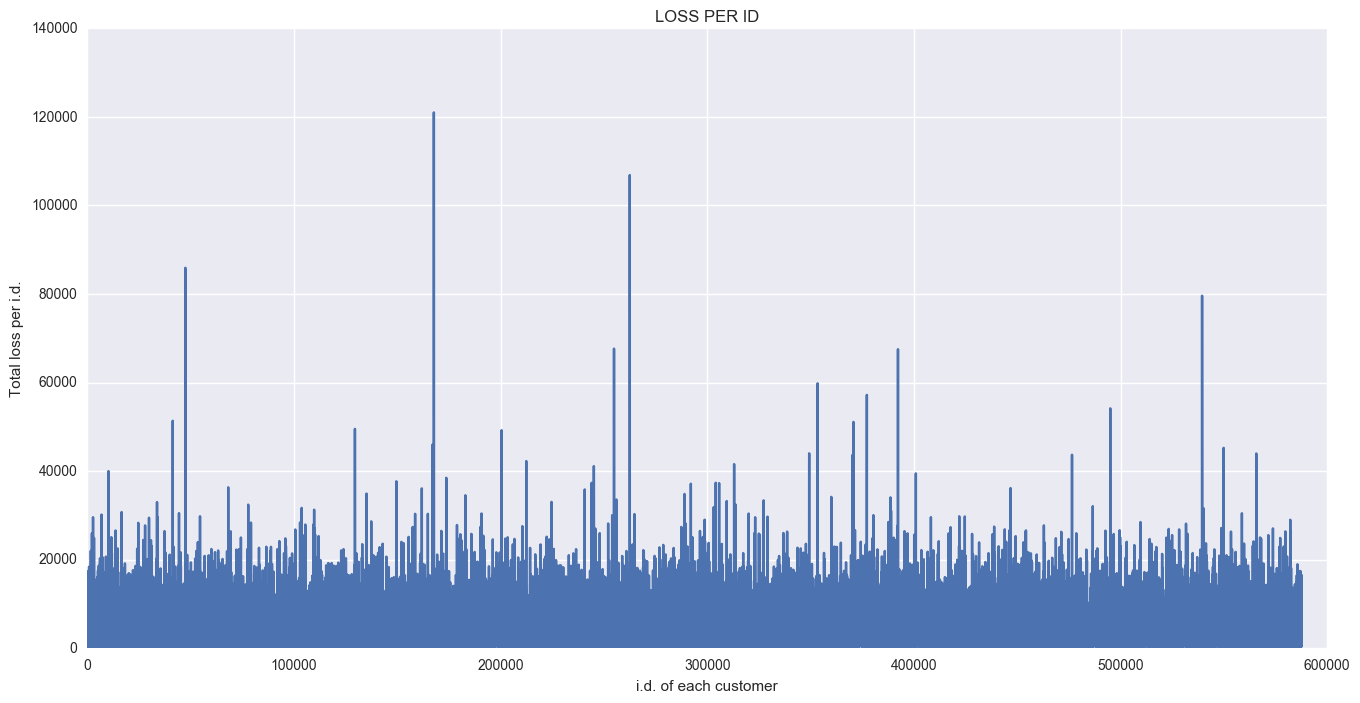

In [13]:
plt.figure(figsize = (16,8))
plt.plot(just_id, target)
plt.xlabel('i.d. of each customer')
plt.ylabel('Total loss per i.d.')
plt.title('LOSS PER ID')




In [14]:
stats.mstats.skew(train['loss']).data

array(3.7949281496777445)

In [15]:
stats.mstats.skew(np.log(train['loss'])).data

array(0.0929738049841997)

log scales allow a large range to be displayed without small values being compressed down into bottom of the graph

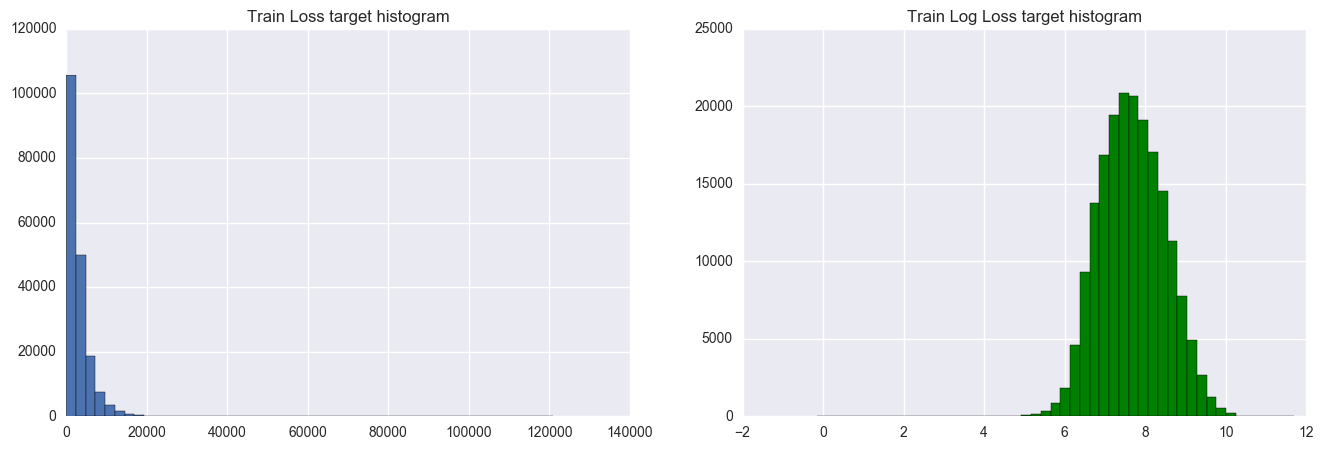

In [16]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_size_inches(16,5)
ax1.hist(train['loss'], bins=50)
ax1.set_title('Train Loss target histogram')
ax1.grid(True)
ax2.hist(np.log(train['loss']), bins=50, color='g')
ax2.set_title('Train Log Loss target histogram')
ax2.grid(True)
plt.show()

In [24]:
data_frames = [ df_cat_dummies, df_cont ]

In [25]:
X_2 = pd.concat(data_frames)


In [26]:
X_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 376636 entries, 0 to 188317
Columns: 1037 entries, cat100_B to cont9
dtypes: float64(1037)
memory usage: 2.9 GB


In [27]:
pca = PCA(n_components=.95)
pca.fit(X_2)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').